# **Machine Learning Techniques for Task Failure Prediction in Cloud Data Centers**

###**[OR]**

# **Cloud Data Centres Task failure prediction using machine learning techniques**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
train_df= pd.read_csv("/content/train_data.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   jobid         20000 non-null  object 
 1   memory        20000 non-null  float64
 2   networklog10  20000 non-null  float64
 3   localIOlog10  20000 non-null  float64
 4   NFSIOlog10    20000 non-null  float64
 5   failed        20000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
train_df.head()

,jobid,memory,networklog10,localIOlog10,NFSIOlog10,failed
0,jobID1634295,44.3904,-1.0262,0.8033,-3.0000,0
1,jobID2033452,31.5839,-1.4608,-0.6080,-2.9967,0
2,jobID2068800,154.4610,-0.5508,-0.3637,-3.0000,0
3,jobID78826,71.8570,3.5701,-0.1281,2.3040,0
4,jobID2935014,30.0370,3.3094,-0.9463,-3.0000,0


<AxesSubplot:>

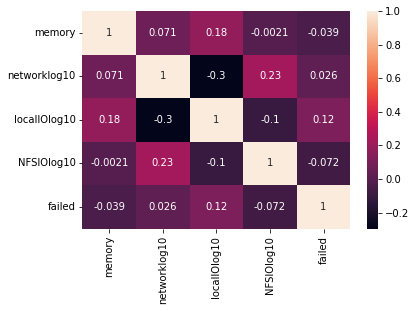

In [ ]:
#plt.figure(figsize=(16, 6))
sns.heatmap(train_df.corr(), annot=True)

In [ ]:
print(train_df.shape)

(20000, 6)


<AxesSubplot:xlabel='failed', ylabel='count'>

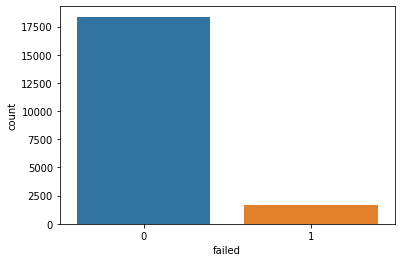

In [ ]:
sns.countplot(x="failed", data=train_df)

In [ ]:
x=train_df.iloc[:,1:5]
y=train_df.iloc[:,5]

# **Data splitting**

In [ ]:
#x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 4), (4000, 4), (16000,), (4000,))

# **Model Accessing**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics

In [ ]:
#RANDOM FOREST
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
val1 = accuracy_score(y_test, predictions) *100
print(val1)
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for RF: 
[[3672   28]
 [ 187  113]]
94.625
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3700
           1       0.80      0.38      0.51       300

    accuracy                           0.95      4000
   macro avg       0.88      0.68      0.74      4000
weighted avg       0.94      0.95      0.94      4000



In [ ]:
#LOGISTIC REGRESSSION
log = LogisticRegression()
log.fit(x_train, y_train)
predictions = log.predict(x_test)
print("*Confusion Matrix for log: ")
print(confusion_matrix(y_test, predictions))
val2 = accuracy_score(y_test, predictions) *100
print(val2)
print("*Classification Report for log: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for log: 
[[3700    0]
 [ 300    0]]
92.5
*Classification Report for log: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3700
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4000
   macro avg       0.46      0.50      0.48      4000
weighted avg       0.86      0.93      0.89      4000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#DECISION TREE
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
val3 = accuracy_score(y_test, predictions) *100
print(val3)
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for DT: 
[[3500  200]
 [ 166  134]]
90.85
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3700
           1       0.40      0.45      0.42       300

    accuracy                           0.91      4000
   macro avg       0.68      0.70      0.69      4000
weighted avg       0.91      0.91      0.91      4000



In [ ]:
#NAIVE BAYES
nb = GaussianNB()
nb.fit(x_train,y_train)
predictions = nb.predict(x_test)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
val4 = accuracy_score(y_test, predictions) *100
print(val4)
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for GNB: 
[[3700    0]
 [ 300    0]]
92.5
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3700
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4000
   macro avg       0.46      0.50      0.48      4000
weighted avg       0.86      0.93      0.89      4000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
predictions = neigh.predict(x_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
val5 = accuracy_score(y_test, predictions) *100
print(val5)
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for KNN: 
[[3670   30]
 [ 191  109]]
94.475
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3700
           1       0.78      0.36      0.50       300

    accuracy                           0.94      4000
   macro avg       0.87      0.68      0.73      4000
weighted avg       0.94      0.94      0.94      4000



In [ ]:
#SVM
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print("*Confusion Matrix for SVC: ")
print(confusion_matrix(y_test, predictions))
val6 = accuracy_score(y_test, predictions) *100
print(val6)
print("*Classification Report for SVC: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for SVC: 
[[3700    0]
 [ 300    0]]
92.5
*Classification Report for SVC: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3700
           1       0.00      0.00      0.00       300

    accuracy                           0.93      4000
   macro avg       0.46      0.50      0.48      4000
weighted avg       0.86      0.93      0.89      4000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#VOTING CLASSIFIER
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(x_train,y_train)
predictions = eclf1.predict(x_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[3676   24]
 [ 194  106]]


In [ ]:
val7 = accuracy_score(y_test, predictions) *100
print(val7)
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

94.55
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3700
           1       0.82      0.35      0.49       300

    accuracy                           0.95      4000
   macro avg       0.88      0.67      0.73      4000
weighted avg       0.94      0.95      0.94      4000



# **Models Comparision**

In [ ]:
score = [val1,val2,val3,val4,val5,val6,val7]
#make variabel for save the result and to show it
classifier = ('Random Forest','Logistic Regression','Decision Tree','Gaussian Naive Bayes','KNN', 'Support vector machine','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6]
[94.625, 92.5, 90.85, 92.5, 94.475, 92.5, 94.55]


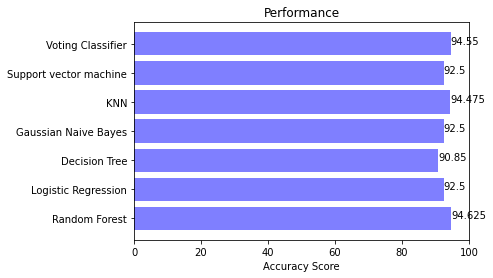

In [ ]:
plt.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt.yticks(y_pos, classifier)
plt.xlabel('Accuracy Score')
plt.xlim(0,100)
plt.title('Performance')
for index, value in enumerate(score):
    plt.text(value, index, str(value))
plt.show()